In [73]:
import requests
import sys
import random
import tensorflow as tf
from datetime import datetime as dt
from datetime import timedelta
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from tensorflow.keras.callbacks import ModelCheckpoint, TensorBoard
from sklearn import preprocessing 
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from alpha_vantage.timeseries import TimeSeries
from collections import deque

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import time
import os
import random

In [74]:
ts = TimeSeries(key='Keys')
data, meta_data = ts.get_intraday('AAPL')
df = pd.DataFrame(columns=['date', 'open', 'high', 'low', 'close', 'volume'])

In [57]:
url = 'https://raw.githubusercontent.com/Francisrega/Stock/development/AAPL_20_Years.csv'
url1 = 'https://raw.githubusercontent.com/Francisrega/Stock/development/AAPL_1_Year.csv'

appl_train = pd.read_csv(url)
appl_test = pd.read_csv(url1)

training_set = appl_train.iloc[:, 1:2].values
test_set = appl_test.iloc[:, 1:2].values

In [58]:
appl_training.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
5279,2020-09-15,118.330002,118.830002,113.610001,115.540001,115.540001,184642000
5280,2020-09-16,115.230003,116.000000,112.040001,112.129997,112.129997,154679000
5281,2020-09-17,109.720001,112.199997,108.709999,110.339996,110.339996,178011000
5282,2020-09-18,110.400002,110.879997,106.089996,106.839996,106.839996,286693600
5283,2020-09-21,104.540001,110.190002,103.099998,110.080002,110.080002,195713815


In [59]:
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [60]:
X_train = []
y_train = []

for i in range (60, 5284):
    X_train.append(training_set_scaled[i-60:i,0])
    y_train.append(training_set_scaled[i,0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [61]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1],1))

In [62]:
regressor = Sequential()

regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [63]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [64]:
regressor.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1],1)))
regressor.add(Dropout(0.2))

In [65]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [70]:
regressor.add(Dense(units = 1))

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

regressor.fit(X_train, y_train, epochs = 300, batch_size = 30)

Train on 5224 samples
Epoch 1/300
5224/5224 [==============================] - 36s 7ms/sample - loss: 4.0229e-04
Epoch 2/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 3.9562e-04
Epoch 3/300
5224/5224 [==============================] - 30s 6ms/sample - loss: 3.6462e-04
Epoch 4/300
5224/5224 [==============================] - 30s 6ms/sample - loss: 3.3946e-04
Epoch 5/300
5224/5224 [==============================] - 30s 6ms/sample - loss: 3.7243e-04
Epoch 6/300
5224/5224 [==============================] - 30s 6ms/sample - loss: 3.8874e-04
Epoch 7/300
5224/5224 [==============================] - 35s 7ms/sample - loss: 4.1370e-04
Epoch 8/300
5224/5224 [==============================] - 32s 6ms/sample - loss: 3.9216e-04
Epoch 9/300
5224/5224 [==============================] - 31s 6ms/sample - loss: 3.2862e-04
Epoch 10/300
5224/5224 [==============================] - 30s 6ms/sample - loss: 3.4315e-04
Epoch 11/300
5224/5224 [==============================] - 29s 6ms/s

5224/5224 [==============================] - 28s 5ms/sample - loss: 2.8683e-04
Epoch 90/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.8685e-04
Epoch 91/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.4974e-04
Epoch 92/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.2545e-04
Epoch 93/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.8961e-04
Epoch 94/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 3.0355e-04
Epoch 95/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.3235e-04
Epoch 96/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.5047e-04
Epoch 97/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.7198e-04
Epoch 98/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.3322e-04
Epoch 99/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.9356e-04
E

5224/5224 [==============================] - 28s 5ms/sample - loss: 2.8343e-04
Epoch 178/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.3965e-04
Epoch 179/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.2320e-04
Epoch 180/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.1533e-04
Epoch 181/300
5224/5224 [==============================] - 27s 5ms/sample - loss: 2.2512e-04
Epoch 182/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.3157e-04
Epoch 183/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.2680e-04
Epoch 184/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.3593e-04
Epoch 185/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.2236e-04
Epoch 186/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.7549e-04
Epoch 187/300
5224/5224 [==============================] - 27s 5ms/sample - loss: 2.

5224/5224 [==============================] - 28s 5ms/sample - loss: 2.1228e-04
Epoch 266/300
5224/5224 [==============================] - 27s 5ms/sample - loss: 2.4519e-04
Epoch 267/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.0662e-04
Epoch 268/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.1395e-04
Epoch 269/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.1943e-04
Epoch 270/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.2709e-04
Epoch 271/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.1045e-04
Epoch 272/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.0958e-04
Epoch 273/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.1158e-04
Epoch 274/300
5224/5224 [==============================] - 27s 5ms/sample - loss: 2.1749e-04
Epoch 275/300
5224/5224 [==============================] - 28s 5ms/sample - loss: 2.

In [71]:
appl_total = pd.concat((appl_train['Open'], appl_test['Open']), axis =0)
inputs = appl_total[len(appl_total) - len(appl_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []

for i in range (60, 76):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1], 1))
predicted_stock_price = regressor.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

<function matplotlib.pyplot.show(*args, **kw)>

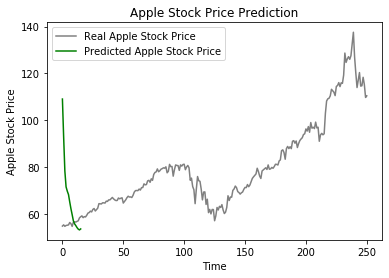

In [78]:
plt.plot(test_set, color = 'grey', label = "Real Apple Stock Price")
plt.plot(predicted_stock_price, color = "green", label = "Predicted Apple Stock Price")
plt.title('Apple Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Apple Stock Price')
plt.legend()
plt.show